Hints and Considerations

* The city data you generate is based on random coordinates as well as different query times; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? Which JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Remember that each coordinate will trigger a separate call to the Google API. If you're creating your own criteria to plan your vacation, try to reduce the results in your DataFrame to 10 or fewer cities.

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Obtain the weather from each city using the OpenWeatherMap API.
* Include a print log of each city as it's being processed, with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json as json
import matplotlib.colors as mcolors
import config
import datetime as dt

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

#date
date = dt.datetime.now().date()

In [ ]:
Linear regression function

In [76]:
#Plot and annotate linear regression

def plt_lin_reg(x_values, regress_values, line_eq, rvalue):
    plt.plot(x_values,regress_values,"k-")
    plt.text(0.95, 0.8, line_eq, fontsize=12, transform=plt.gcf().transFigure)
    r2 = (rvalue**2).round(decimals=2)
    r2_text = (f"r^2 = {r2}")
    plt.text(0.95, 0.75, r2_text, fontsize=12, transform=plt.gcf().transFigure)

Generate Cities List

In [2]:
# List for holding lat_lons and cities
lat_lons = []
cities = []

# Create a set of random lat and lon combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lons = np.random.uniform(lon_range[0], lon_range[1], size=1500)
#lats = np.random.uniform(lat_range[0], lat_range[1], size=20)
#lons = np.random.uniform(lon_range[0], lon_range[1], size=20)

lat_lons = zip(lats, lons)

# Identify nearest city for each lat, lon combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)


613

In [ ]:
Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it's being processed (with the city number and city name).


In [37]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
place = []
lon = []
lat = []
weather = []
weather_desc = []
temp_C = []
feels_like = []
temp_min_C = []
temp_max_C = []
humidity = []
wind_speed = []
clouds = []
country = []
timezone = []
units = "metric"

print(f"Beginning data retrieval")
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
count=0
for city in cities:
    count += 1
    query_url = url + city + "&appid=" + weather_api_key + "&units=" + units
    current_weather = requests.get(query_url).json()
    #print(json.dumps(current_weather, indent=4, sort_keys=True))
    place.append(city)
    print(f"Adding {count}.\t{city}")
    try:
        lat.append(current_weather['coord']['lat'])
        lon.append(current_weather['coord']['lon'])
        temp_C.append(current_weather['main']['temp'])
        feels_like.append(current_weather['main']['feels_like'])
        temp_min_C.append(current_weather['main']['temp_min'])
        temp_max_C.append(current_weather['main']['temp_max'])
        humidity.append(current_weather['main']['humidity'])
        wind_speed.append(current_weather['wind']['speed'])
        clouds.append(current_weather['clouds']['all'])
        country.append(current_weather['sys']['country'])
        timezone.append(current_weather['timezone'])
    except:
        lat.append("555")
        lon.append("555")
        temp_C.append("555")
        feels_like.append("555")
        temp_min_C.append("555")
        temp_max_C.append("555")
        humidity.append("555")
        wind_speed.append("555")
        clouds.append("555")
        country.append("555")
        timezone.append("555")

#len(lat)
#print(query_url)

Beginning data retrieval
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Adding 1.	araouane
Adding 2.	barra patuca
Adding 3.	rikitea
Adding 4.	haines junction
Adding 5.	barentsburg
Adding 6.	ponta do sol
Adding 7.	albany
Adding 8.	anadyr
Adding 9.	vaini
Adding 10.	kushiro
Adding 11.	podstepki
Adding 12.	ribeira grande
Adding 13.	iqaluit
Adding 14.	gwadar
Adding 15.	hobart
Adding 16.	hermanus
Adding 17.	jamestown
Adding 18.	butaritari
Adding 19.	new norfolk
Adding 20.	oksfjord
Adding 21.	tiksi
Adding 22.	airai
Adding 23.	bandrele
Adding 24.	okhotsk
Adding 25.	ushuaia
Adding 26.	wanning
Adding 27.	port alfred
Adding 28.	bolungarvik
Adding 29.	busselton
Adding 30.	zanjan
Adding 31.	labuhan
Adding 32.	puerto ayora
Adding 33.	korla
Adding 34.	katsuura
Adding 35.	chokurdakh
Adding 36.	la ronge
Adding 37.	saint-philippe
Adding 38.	laredo
Adding 39.	bredasdorp
Adding 40.	mount pleasant
Adding 41.	khalkhal
Adding 42.	avarua
Adding 43.	great falls
Adding 44.	mana
Adding 45.	borovoy
Adding 46.	mackay
Adding 47.	s

Adding 388.	riverton
Adding 389.	mogadishu
Adding 390.	semnan
Adding 391.	campo verde
Adding 392.	astana
Adding 393.	eydhafushi
Adding 394.	hurghada
Adding 395.	chauk
Adding 396.	dawlatabad
Adding 397.	pevek
Adding 398.	viedma
Adding 399.	karamay
Adding 400.	miranorte
Adding 401.	kuvshinovo
Adding 402.	ulladulla
Adding 403.	xinmin
Adding 404.	benguela
Adding 405.	verkhoyansk
Adding 406.	trairi
Adding 407.	saint george
Adding 408.	campbell river
Adding 409.	aksu
Adding 410.	xique-xique
Adding 411.	taber
Adding 412.	guerrero negro
Adding 413.	narsaq
Adding 414.	te anau
Adding 415.	touros
Adding 416.	portree
Adding 417.	west bay
Adding 418.	praia da vitoria
Adding 419.	grand river south east
Adding 420.	bardiyah
Adding 421.	coetupo
Adding 422.	hailar
Adding 423.	katsiveli
Adding 424.	sorland
Adding 425.	mafinga
Adding 426.	dali
Adding 427.	auki
Adding 428.	karratha
Adding 429.	dingle
Adding 430.	tessaoua
Adding 431.	ritchie
Adding 432.	luebo
Adding 433.	hami
Adding 434.	meulaboh
Adding 43

In [4]:
#Convert Raw Data to DataFrame
cities_df = pd.DataFrame({
    "City": place,
    "Lat": lat,
    "Lon": lon,
    "Temp_C": temp_C,
    "Feels_like": feels_like,
    "Temp_min_C": temp_min_C,
    "Temp_max_C": temp_max_C,
    "Humidity": humidity,
    "Wind_speed_mph": wind_speed,
    "Clouds": clouds,
    "Country": country,
    "Time_zone": timezone
})

#Export the city data into a .csv - not yet, waiting for next cleanup steps.
#cities_df.to_csv(output_data_file)

#Display the DataFrame
cities_df


,City,Lat,Lon,Temp_C,Feels_like,Temp_min_C,Temp_max_C,Humidity,Wind_speed_mph,Clouds,Country,Time_zone
0,araouane,18.9,-3.53,43.91,40.28,43.91,43.91,10,3.72,6,ML,0
1,barra patuca,15.8,-84.28,29.49,32.4,29.49,29.49,70,3.68,100,HN,-21600
2,rikitea,-23.12,-134.97,19.99,16.21,19.99,19.99,59,6.17,1,PF,-32400
3,haines junction,60.75,-137.51,9.91,7.78,9.91,9.91,79,1.87,65,CA,-25200
4,barentsburg,555,555,555,555,555,555,555,555,555,555,555
...,...,...,...,...,...,...,...,...,...,...,...,...
608,burns lake,54.23,-125.75,9.97,7.71,9.97,9.97,74,1.78,100,CA,-25200
609,villers-les-nancy,48.67,6.15,26.91,23.31,26,29,34,5.1,20,FR,7200
610,douglas,41.3,-96.17,28.77,32.22,28.33,29,74,3.1,1,US,-18000
611,baykit,61.67,96.37,10.29,9.03,10.29,10.29,87,1.21,57,RU,25200


Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [5]:
#Reset datatypes
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Lon"] = pd.to_numeric(cities_df["Lon"])
cities_df["Temp_C"] = pd.to_numeric(cities_df["Temp_C"])
cities_df["Feels_like"] = pd.to_numeric(cities_df["Feels_like"])
cities_df["Temp_min_C"] = pd.to_numeric(cities_df["Temp_min_C"])
cities_df["Temp_max_C"] = pd.to_numeric(cities_df["Temp_max_C"])
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Wind_speed_mph"] = pd.to_numeric(cities_df["Wind_speed_mph"])
cities_df["Clouds"] = pd.to_numeric(cities_df["Clouds"])
cities_df["Time_zone"] = pd.to_numeric(cities_df["Time_zone"])
#cities_df.dtypes

#If checking for relative humidity > 100 (not sure why, it can happen, although rare), may as well 
#drop any offenders at the same time. 

#Also dropping rows with "555" (no data, see cell above) values.

cities_df.drop(cities_df[cities_df['Humidity'] > 100].index, inplace = True)
cities_df.drop(cities_df[cities_df['Temp_C'] == 555].index, inplace = True)

#Export the city data into a .csv
cities_df.to_csv(output_data_file)

#Display the DataFrame
cities_df

,City,Lat,Lon,Temp_C,Feels_like,Temp_min_C,Temp_max_C,Humidity,Wind_speed_mph,Clouds,Country,Time_zone
0,araouane,18.90,-3.53,43.91,40.28,43.91,43.91,10,3.72,6,ML,0
1,barra patuca,15.80,-84.28,29.49,32.40,29.49,29.49,70,3.68,100,HN,-21600
2,rikitea,-23.12,-134.97,19.99,16.21,19.99,19.99,59,6.17,1,PF,-32400
3,haines junction,60.75,-137.51,9.91,7.78,9.91,9.91,79,1.87,65,CA,-25200
5,ponta do sol,32.67,-17.10,26.10,21.05,25.00,29.00,39,7.70,20,PT,3600
...,...,...,...,...,...,...,...,...,...,...,...,...
608,burns lake,54.23,-125.75,9.97,7.71,9.97,9.97,74,1.78,100,CA,-25200
609,villers-les-nancy,48.67,6.15,26.91,23.31,26.00,29.00,34,5.10,20,FR,7200
610,douglas,41.30,-96.17,28.77,32.22,28.33,29.00,74,3.10,1,US,-18000
611,baykit,61.67,96.37,10.29,9.03,10.29,10.29,87,1.21,57,RU,25200


Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Maximum temperature (F) vs. Latitude

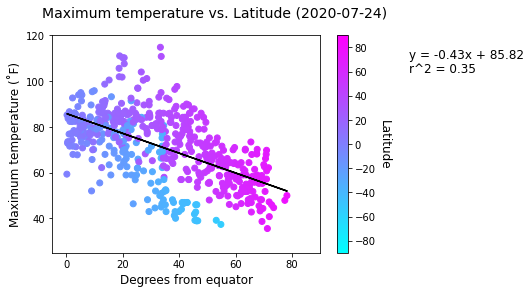

In [77]:
#Easier to compare hemispheres (in my opinion) when plotted as degrees from equator rather than straight latitude.

#Set colorbar parameters
colors = plt.set_cmap('cool')
norm = mcolors.TwoSlopeNorm(vmin=-90, vcenter=0, vmax=90)

#Calculate linear regression
y_values = ((cities_df["Temp_max_C"]*(9/5))+32)
x_values = abs(cities_df["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c=cities_df.Lat, cmap=colors, norm=norm)
plt.xlim(-5, 90)
plt.ylim(25, 120)

#Add and label colorbar
colorbar = plt.colorbar()
colorbar.set_label('Latitude', rotation=270, size = 12, labelpad=15)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Degrees from equator', size=12)
plt.ylabel('Maximum temperature (˚F)', size=12)
plt.suptitle((f"Maximum temperature vs. Latitude ({date})"), size=14)

#Save to file and print to screen
plt.savefig('../output_data/Fig1_Max_temp_vs_latitude.png')
plt.show()


Humidity (%) vs. Latitude

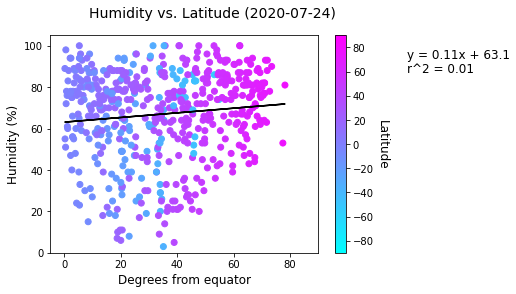

In [78]:
#Set colorbar parameters
colors = plt.set_cmap('cool')
norm = mcolors.TwoSlopeNorm(vmin=-90, vcenter=0, vmax=90)

#Calculate linear regression
y_values = cities_df["Humidity"]
x_values = abs(cities_df["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c=cities_df.Lat, cmap=colors, norm=norm)
plt.xlim(-5, 90)
plt.ylim(0, 105)

#Add and label colorbar
colorbar = plt.colorbar()
colorbar.set_label('Latitude', rotation=270, size = 12, labelpad=15)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Degrees from equator', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.suptitle((f"Humidity vs. Latitude ({date})"), size=14)

#Save to file and print to screen
plt.savefig('../output_data/Fig2_Humidity_vs_latitude.png')
plt.show()

Cloudiness (%) vs. Latitude

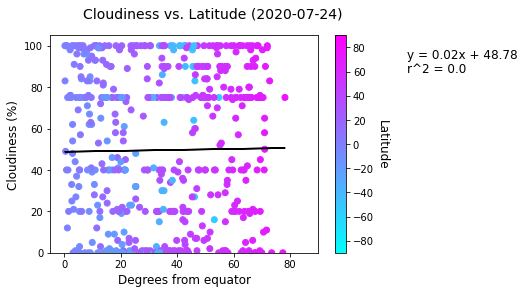

In [79]:
#Set colorbar parameters
colors = plt.set_cmap('cool')
norm = mcolors.TwoSlopeNorm(vmin=-90, vcenter=0, vmax=90)

#Calculate linear regression
y_values = cities_df["Clouds"]
x_values = abs(cities_df["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c=cities_df.Lat, cmap=colors, norm=norm)
plt.xlim(-5, 90)
plt.ylim(0, 105)

#Add and label colorbar
colorbar = plt.colorbar()
colorbar.set_label('Latitude', rotation=270, size = 12, labelpad=15)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Degrees from equator', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.suptitle((f"Cloudiness vs. Latitude ({date})"), size=14)

#Save to file and print to screen
plt.savefig('../output_data/Fig3_Cloudiness_vs_latitude.png')
plt.show()

Wind Speed (mph) vs. Latitude

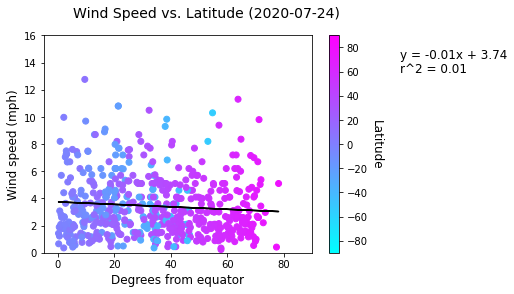

In [80]:
#Set colorbar parameters
colors = plt.set_cmap('cool')
norm = mcolors.TwoSlopeNorm(vmin=-90, vcenter=0, vmax=90)

#Calculate linear regression
y_values = cities_df["Wind_speed_mph"]
x_values = abs(cities_df["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c=cities_df.Lat, cmap=colors, norm=norm)
plt.xlim(-5, 90)
plt.ylim(0, 16)

#Add and label colorbar
colorbar = plt.colorbar()
colorbar.set_label('Latitude', rotation=270, size = 12, labelpad=15)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Degrees from equator', size=12)
plt.ylabel('Wind speed (mph)', size=12)
plt.suptitle((f"Wind Speed vs. Latitude ({date})"), size=14)

#Save to file and print to screen
plt.savefig('../output_data/Fig4_Wind_speed_vs_latitude.png')
plt.show()

# North vs. South

Create Northern and Southern Hemisphere DataFrames (assigning the equator to the south, just because)

In [12]:
SH_cities_df = cities_df.drop(cities_df[cities_df['Lat'] > 0].index)
#SH_cities_df
NH_cities_df = cities_df.drop(cities_df[cities_df['Lat'] <= 0].index)
#NH_cities_df

,City,Lat,Lon,Temp_C,Feels_like,Temp_min_C,Temp_max_C,Humidity,Wind_speed_mph,Clouds,Country,Time_zone
0,araouane,18.90,-3.53,43.91,40.28,43.91,43.91,10,3.72,6,ML,0
1,barra patuca,15.80,-84.28,29.49,32.40,29.49,29.49,70,3.68,100,HN,-21600
3,haines junction,60.75,-137.51,9.91,7.78,9.91,9.91,79,1.87,65,CA,-25200
5,ponta do sol,32.67,-17.10,26.10,21.05,25.00,29.00,39,7.70,20,PT,3600
6,albany,42.60,-73.97,25.31,25.94,24.44,26.11,61,2.63,100,US,-14400
...,...,...,...,...,...,...,...,...,...,...,...,...
607,kitakyushu,33.83,130.83,25.09,25.03,24.44,26.00,65,4.10,35,JP,32400
608,burns lake,54.23,-125.75,9.97,7.71,9.97,9.97,74,1.78,100,CA,-25200
609,villers-les-nancy,48.67,6.15,26.91,23.31,26.00,29.00,34,5.10,20,FR,7200
610,douglas,41.30,-96.17,28.77,32.22,28.33,29.00,74,3.10,1,US,-18000


## Maximum Temperature vs. Latitude

### Northern Hemisphere

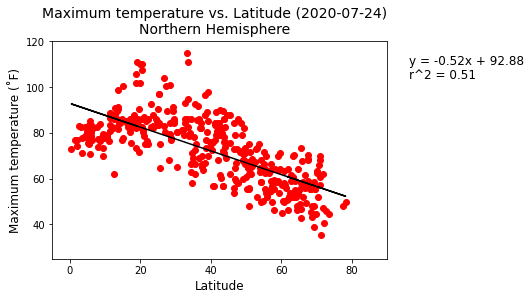

In [68]:
#Convert temperature units, calculate linear regression
y_values = ((NH_cities_df["Temp_max_C"]*(9/5))+32)
x_values = NH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values,c="red")
plt.xlim(-5, 90)
plt.ylim(25, 120)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Maximum temperature (˚F)', size=12)
plt.suptitle((f"Maximum temperature vs. Latitude ({date})\nNorthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig5_NH_Max_temp_vs_latitude.png')
plt.show()

### Southern Hemisphere

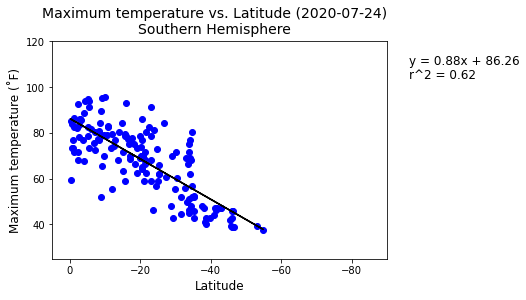

In [81]:
#Convert temperature units, calculate linear regression
y_values = ((SH_cities_df["Temp_max_C"]*(9/5))+32)
x_values = SH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="b")
plt.xlim(5, -90)
plt.ylim(25, 120)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Maximum temperature (˚F)', size=12)
plt.suptitle((f"Maximum temperature vs. Latitude ({date})\nSouthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig6_SH_Max_temp_vs_latitude.png')
plt.show()

### Observations

First a caveat for all these observations: They are based on a single day, obviously that's not the full story. Furthermore, the cities are in different time zones, and of course night and day weather can be different (both in itself and in its impact on vacationers). For temperature, using the maximum should counteract this somewhat, but there's no obvious fix for the other parameters.
    
Records for e.g. the last 5 days would be better, but that is a lot more data, and longer-term data costs money. Another possibility would be to divide calls to the database by timezone, doing a call at e.g. local noon until the complete set was accumulated.

Note also there are more NH cities, and they extend further poleward, reflecting the (current!) distribution of the continents.

For temperature specifically, it is (surprise!) generally warmer near the equator, with decent r^2 values. As we are in SH winter, the temperature there drops off more quickly (the slope is steeper) moving poleward. The most extreme high temperatures are found in the NH, but at least in this sample they are not directly at the equator. I think I will skip the Earth Sciences digression, but this is also not unexpected.

## Humidity vs. Latitude

### Northern Hemisphere 

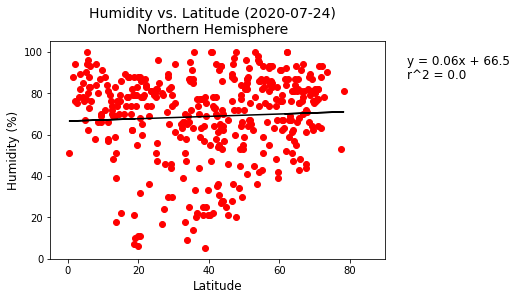

In [70]:
#Calculate linear regression
y_values = NH_cities_df["Humidity"]
x_values = NH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="r")
plt.xlim(-5, 90)
plt.ylim(0, 105)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.suptitle((f"Humidity vs. Latitude ({date})\nNorthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig7_NH_Humidity_vs_latitude.png')
plt.show()

### Southern Hemisphere

In [ ]:
# Calculate linear regression
y_values = SH_cities_df["Humidity"]
x_values = SH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="b")
plt.xlim(5, -90)
plt.ylim(0, 105)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.suptitle((f"Humidity vs. Latitude ({date})\nSouthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig8_SH_Humidity_vs_latitude.png')
plt.show()

### Observations

Humidity covers a wide range in both hemispheres, with no significant latitudinal trend by linear regression. It does seem that the range may get narrower toward the poles; a different statistical test is needed, to see whether this is an effect of greater sampling intensity nearer the equator.

## Cloudiness vs. Latitude

### Northern Hemisphere

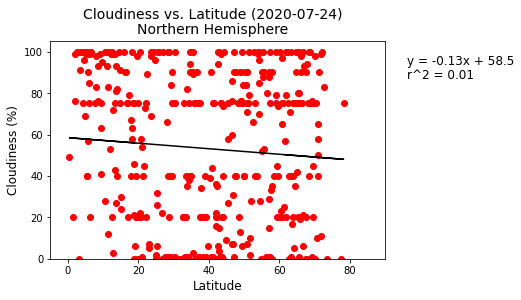

In [72]:
#Calculate linear regression
y_values = NH_cities_df["Clouds"]
x_values = NH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="r")
plt.xlim(-5, 90)
plt.ylim(0, 105)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.suptitle((f"Cloudiness vs. Latitude ({date})\nNorthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig9_NH_Cloudiness_vs_latitude.png')
plt.show()

### Southern Hemisphere

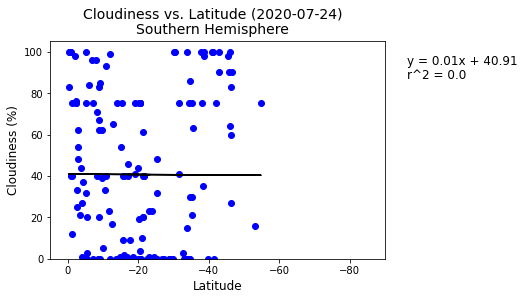

In [83]:
#Calculate linear regression
y_values = SH_cities_df["Clouds"]
x_values = SH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="blue")
plt.xlim(5, -90)
plt.ylim(0, 105)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.suptitle((f"Cloudiness vs. Latitude ({date})\nSouthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig10_SH_Cloudiness_vs_latitude.png')
plt.show()

### Observations

At this level of analysis there are no significant trends in cloudiness. However, linear regression is likely not the proper test for all the data. It appears that at many stations it is collected with much broader categories (0/20/40/60/80/100) than at others. The cities should be split into two groups and analyzed separately.

## Wind Speed vs. Latitude

### Northern Hemisphere

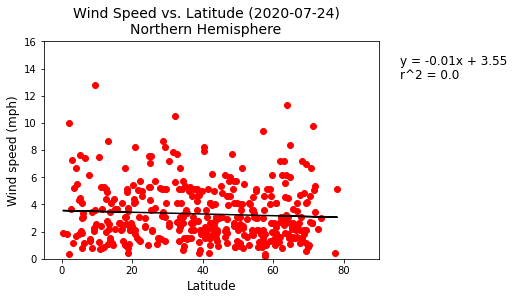

In [74]:
#Calculate linear regression
y_values = NH_cities_df["Wind_speed_mph"]
x_values = NH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="red")
plt.xlim(-5, 90)
plt.ylim(0, 16)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Wind speed (mph)', size=12)
plt.suptitle((f"Wind Speed vs. Latitude ({date})\nNorthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig11_NH_Wind_Speed_vs_latitude.png')
plt.show()

### Southern Hemisphere

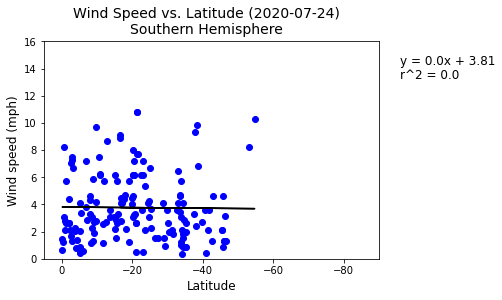

In [84]:
#Calculate linear regression
y_values = SH_cities_df["Wind_speed_mph"]
x_values = SH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="blue")
plt.xlim(5, -90)
plt.ylim(0, 16)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Wind speed (mph)', size=12)
plt.suptitle((f"Wind Speed vs. Latitude ({date})\nSouthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig12_SH_Wind_Speed_vs_latitude.png')
plt.show()

### Observations

In [ ]:
On this day at this time for this sample of cities there are no significant trends... I predict this will not 